In [20]:
from covidPreprocess import getCoronaVocabulary 

In [3]:
X, Y, vectorizerText = getCoronaVocabulary()


Extracting tokens from each review.....(can be slow for a large number of reviews)......
there are 82 nan titles
there are 10 nan text


C:\Users\Mia Markovic\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Data shape for text:  (1164, 4651)
Data shape for text:  (1164, 4651)
Vocabulary for text:  ['1', '1 2', '10', '10 day', '10 percent', '10 year', '100', '100 year', '1000', '10000', '100000', '11', '11 million', '12', '12 18', '13', '14', '14 day', '15', '150', '150000', '16', '17', '18', '18 2019', '18 month', '19', '1918', '1989', '2', '2 week', '20', '20 mile', '20 second', '200', '2000', '20000', '200000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2009', '201', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2019 new', '2019 novel', '2020', '2021', '21', '22', '23', '24', '24 hour', '25', '26', '27', '28', '29', '3', '30', '300', '3000', '30000', '31', '33', '35', '36', '4', '40', '400', '41', '44', '45', '48', '4g', '5', '50', '50 million', '500', '5000', '50000', '56', '5g', '5g ha', '5g network', '5g rollout', '5g technology', '5g tower', '6', '6 foot', '60', '60 alcohol', '600', '65', '65 million', '7', '70', '72', '72 hour', '75', '8', '

In [21]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
lemmStop = [lemmatizer.lemmatize(t) for t in stopwords.words('english')]

def getLemmatizedStopwords():
    return lemmStop

In [22]:
import nltk 
from nltk import word_tokenize
import simplejson as json
import sklearn
from sklearn.feature_extraction.text import * 
from sklearn.model_selection import train_test_split 

from sklearn import linear_model 
from sklearn import metrics 

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import preprocessingFunctions as pf

coronafile =  pd.read_csv("../datasets/corona_fake.csv")

#cleaning up broken data according to labels added by
# https://towardsdatascience.com/explore-covid-19-infodemic-2d1ceaae2306
coronafile.loc[5]['label'] = 'fake'
coronafile.loc[15]['label'] = 'true'
coronafile.loc[43]['label'] = 'fake'
coronafile.loc[131]['label'] = 'true'
coronafile.loc[242]['label'] = 'fake'


def getFakeCoronaVocabulary():
    text = []
    #titles = []
    Y = []
    i = 0
    nanTitle = 0
    nanText = 0
    print('\nExtracting tokens from each review.....(can be slow for a large number of reviews)......')   
    for d in coronafile.loc:
        ftext = d['text']   # keep only the text and label
        ftitle = d['title']      
        label = (d['label']).lower()
        
        if label == 'fake':
            score = 1 #1 for true, 0 for fake
            if (label == "fake"):
                score = 0

            #some documents might not have titles (or possible text?)
            #these are stored as NaN so replace with an empty string
            if (not isinstance(ftext, str) and np.isnan([ftext])):
                ftext = ""
                nanText += 1
            if (not isinstance(ftitle, str) and np.isnan(ftitle)):
                ftitle = ""
                nanTitle += 1

            ftext = ftext + ftitle #combining the text and title into one
            ftext = pf.replaceCommas(ftext)

            text.append(ftext)   
            #titles.append(ftitle)
            Y.append(score)
            i += 1
            if (i == 578):
                #for some reason the for loop doesnt know when to stop so put in a manual break
                break
    print("there are", nanTitle, "nan titles")
    print("there are", nanText, "nan text")
        
    # create an instance of a CountVectorizer, using 
    # (1) the standard 'english' stopword set 
    # (2) only keeping terms in the vocabulary that occur in at least 1% of documents
    # (3) allowing both unigrams and bigrams in the vocabulary (use "ngram_range=(1,2)" to do this)
    vectorizerText = CountVectorizer(stop_words = getLemmatizedStopwords(), min_df=.01, ngram_range=(1,2), tokenizer= pf.LemmaTokenizer() )
    #vectorizerNoLem = CountVectorizer(stop_words = 'english', min_df=.01, ngram_range=(1,2)) #no lemmatization
    
    # create a sparse BOW array from 'text' using vectorizer  
    X = vectorizerText.fit_transform(text)
    print(X.toarray().shape)
    #X2 = vectorizerNoLem.fit_transform(text)
    
    print('Data shape for text: ', X.shape)
    # print('Data shape for text: ', X2.shape)
    
    #can comment out to not see the vocabularies
#     print('Vocabulary for text: ', vectorizerText.get_feature_names())
#     print('Count Vectorizer Vocab', vectorizerText.vocabulary_)

    return X, Y, vectorizerText

fake_X, fake_Y, fakeVectorizerText = getFakeCoronaVocabulary()


Extracting tokens from each review.....(can be slow for a large number of reviews)......
there are 80 nan titles
there are 7 nan text


C:\Users\Mia Markovic\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(578, 6341)
Data shape for text:  (578, 6341)


### Top 10 Words in False Articles 

In [23]:
from collections import defaultdict
## Fixed

fake_vocab_counts = np.array(fake_X.toarray())
fake_vocab_counts = fake_vocab_counts.sum(axis=0)

fake_term_counts = dict()

for term, index in fakeVectorizerText.vocabulary_.items():
    fake_term_counts[term] = fake_vocab_counts[index]

top_10_fake = sorted(fake_term_counts.items(), key=(lambda x : -x[1]))[:10]
print(top_10_fake)

[('coronavirus', 2573), ('virus', 2178), ('china', 1375), ('vaccine', 1363), ('people', 1274), ('wuhan', 1089), ('world', 933), ('one', 908), ('also', 889), ('new', 870)]


In [27]:
# fake_counter = sum(fakeVectorizerText.vocabulary_.values())
fake_counter = 0
# all_counter = sum(vectorizerText.vocabulary_.values())
all_counter = 0

for num1 in fakeVectorizerText.vocabulary_.values():
    fake_counter += num1

for num in vectorizerText.vocabulary_.values():
    all_counter += num
   
print(fake_counter)
print(all_counter)

20100970
10813575


In [25]:
coronafile =  pd.read_csv("../datasets/corona_fake.csv")

#cleaning up broken data according to labels added by
# https://towardsdatascience.com/explore-covid-19-infodemic-2d1ceaae2306
coronafile.loc[5]['label'] = 'fake'
coronafile.loc[15]['label'] = 'true'
coronafile.loc[43]['label'] = 'fake'
coronafile.loc[131]['label'] = 'true'
coronafile.loc[242]['label'] = 'fake'

def getTrueCoronaVocabulary():
    text = []
    #titles = []
    Y = []
    i = 0
    nanTitle = 0
    nanText = 0
    print('\nExtracting tokens from each review.....(can be slow for a large number of reviews)......')   
    for d in coronafile.loc:
        ftext = d['text']   # keep only the text and label
        ftitle = d['title']      
        label = (d['label']).lower()
        
        if label == 'true':
            score = 1 #1 for true, 0 for fake
            if (label == "fake"):
                score = 0

            #some documents might not have titles (or possible text?)
            #these are stored as NaN so replace with an empty string
            if (not isinstance(ftext, str) and np.isnan([ftext])):
                ftext = ""
                nanText += 1
            if (not isinstance(ftitle, str) and np.isnan(ftitle)):
                ftitle = ""
                nanTitle += 1

            ftext = ftext + ftitle #combining the text and title into one
            ftext = pf.replaceCommas(ftext)

            text.append(ftext)   
            #titles.append(ftitle)
            Y.append(score)
            i += 1
            if (i == 586):
                #for some reason the for loop doesnt know when to stop so put in a manual break
                break
    print("there are", nanTitle, "nan titles")
    print("there are", nanText, "nan text")
        
    # create an instance of a CountVectorizer, using 
    # (1) the standard 'english' stopword set 
    # (2) only keeping terms in the vocabulary that occur in at least 1% of documents
    # (3) allowing both unigrams and bigrams in the vocabulary (use "ngram_range=(1,2)" to do this)
    vectorizerText = CountVectorizer(stop_words = getLemmatizedStopwords(), min_df=.01, ngram_range=(1,2), tokenizer= pf.LemmaTokenizer() )
    #vectorizerNoLem = CountVectorizer(stop_words = 'english', min_df=.01, ngram_range=(1,2)) #no lemmatization
    
    # create a sparse BOW array from 'text' using vectorizer  
    X = vectorizerText.fit_transform(text)
    #X2 = vectorizerNoLem.fit_transform(text)
    
    print('Data shape for text: ', X.shape)
    # print('Data shape for text: ', X2.shape)
    
    #can comment out to not see the vocabularies
#     print('Vocabulary for text: ', vectorizerText.get_feature_names())
#     print('Count Vectorizer Vocab', vectorizerText.vocabulary_)

    return X, Y, vectorizerText

true_X, true_Y, trueVectorizerText = getTrueCoronaVocabulary()


Extracting tokens from each review.....(can be slow for a large number of reviews)......
there are 2 nan titles
there are 3 nan text
Data shape for text:  (586, 4913)


In [28]:
true_counter = sum(trueVectorizerText.vocabulary_.values())

true_and_fake_counter = true_counter + fake_counter

top_10_fake_percentage_of_fake = np.array(top_10_fake)[:,1]
top_10_fake_percentage_of_total = np.array(top_10_fake)[:,1]

top_10_fake_percentage_of_fake = np.array(top_10_fake_percentage_of_fake, dtype=np.float64)
top_10_fake_percentage_of_total = np.array(top_10_fake_percentage_of_total, dtype=np.float64)


top_10_fake_percentage_of_fake = top_10_fake_percentage_of_fake / fake_counter
top_10_fake_percentage_of_total = top_10_fake_percentage_of_total / true_and_fake_counter

In [29]:
## Fixed

true_vocab_counts = np.array(true_X.toarray())
true_vocab_counts = true_vocab_counts.sum(axis=0)

true_counter = true_vocab_counts.sum()

fake_vocab_counts = np.array(fake_X.toarray())
fake_vocab_counts = fake_vocab_counts.sum(axis=0)

fake_counter = fake_vocab_counts.sum()

true_and_fake_counter = true_counter + fake_counter

top_10_fake_percentage_of_fake = np.array(top_10_fake)[:,1]
top_10_fake_percentage_of_total = np.array(top_10_fake)[:,1]

top_10_fake_percentage_of_fake = np.array(top_10_fake_percentage_of_fake, dtype=np.float64)
top_10_fake_percentage_of_total = np.array(top_10_fake_percentage_of_total, dtype=np.float64)


top_10_fake_percentage_of_fake = top_10_fake_percentage_of_fake / fake_counter
top_10_fake_percentage_of_total = top_10_fake_percentage_of_total / true_and_fake_counter

### Top 10 Words in False Articles (as percentage of total number of words in fake articles)

In [30]:
import matplotlib.pyplot as plt

In [31]:
top_10_fake_words = np.array(top_10_fake)[:,0]

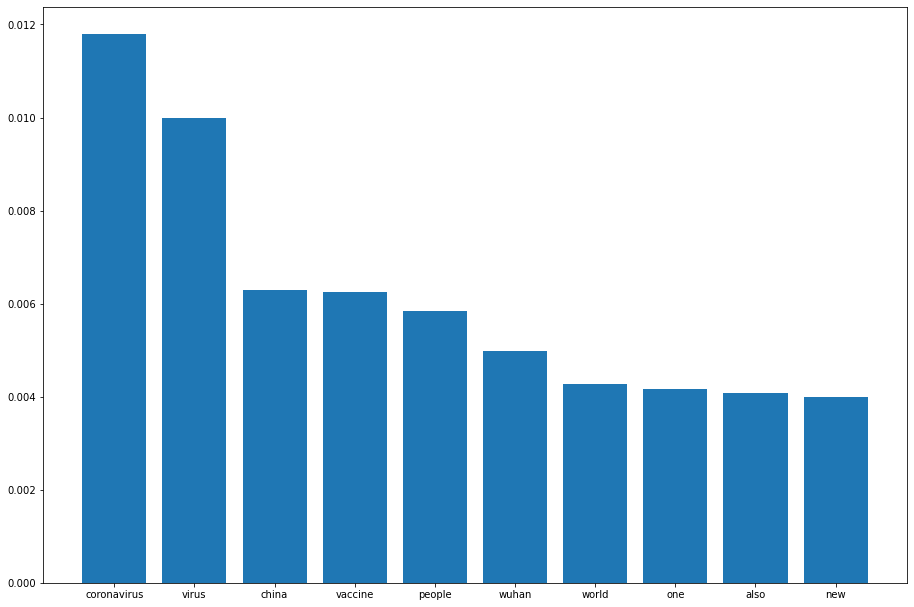

In [32]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(top_10_fake_words, top_10_fake_percentage_of_fake)
plt.show()

### Top 10 Words in False Articles (as percentage of total number of words in fake articles + true articles)

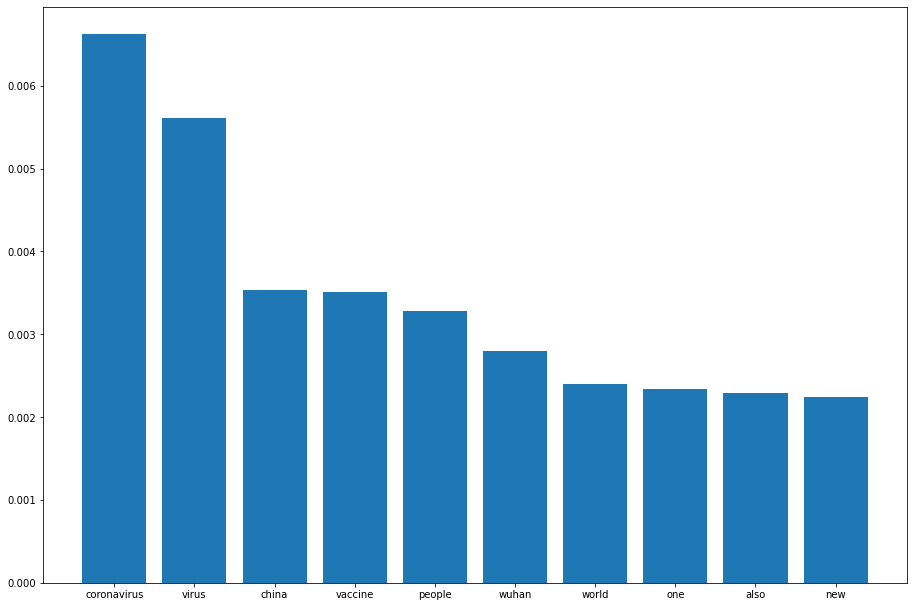

In [33]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(top_10_fake_words, top_10_fake_percentage_of_total)
plt.show()

### Top 10 Words in True Articles 

In [34]:
## Fixed

true_vocab_counts = np.array(true_X.toarray())
true_vocab_counts = true_vocab_counts.sum(axis=0)

true_term_counts = dict()

for term, index in trueVectorizerText.vocabulary_.items():
    true_term_counts[term] = true_vocab_counts[index]

top_10_true = sorted(true_term_counts.items(), key=(lambda x : -x[1]))[:10]
print(top_10_true)

[('virus', 2136), ('people', 1731), ('coronavirus', 1643), ('vaccine', 1278), ('health', 1020), ('said', 1000), ('disease', 941), ('symptom', 875), ('new', 819), ('may', 809)]


### Top 10 Words in True Articles (as percentage of total number of words in True articles)

In [35]:
top_10_true_percentage_of_true = np.array(top_10_true)[:,1]
top_10_true_percentage_of_total = np.array(top_10_true)[:,1]

top_10_true_percentage_of_true = np.array(top_10_true_percentage_of_true, dtype=np.float64)
top_10_true_percentage_of_total = np.array(top_10_true_percentage_of_total, dtype=np.float64)


top_10_true_percentage_of_true = top_10_true_percentage_of_true / true_counter
top_10_true_percentage_of_total = top_10_true_percentage_of_total / true_and_fake_counter

top_10_true_words = np.array(top_10_true)[:,0]

In [36]:
## Fixed
top_10_true_percentage_of_true = np.array(top_10_true)[:,1]
top_10_true_percentage_of_total = np.array(top_10_true)[:,1]

top_10_true_percentage_of_true = np.array(top_10_true_percentage_of_true, dtype=np.float64)
top_10_true_percentage_of_total = np.array(top_10_true_percentage_of_total, dtype=np.float64)


top_10_true_percentage_of_true = top_10_true_percentage_of_true / true_counter
top_10_true_percentage_of_total = top_10_true_percentage_of_total / true_and_fake_counter

top_10_true_words = np.array(top_10_true)[:,0]

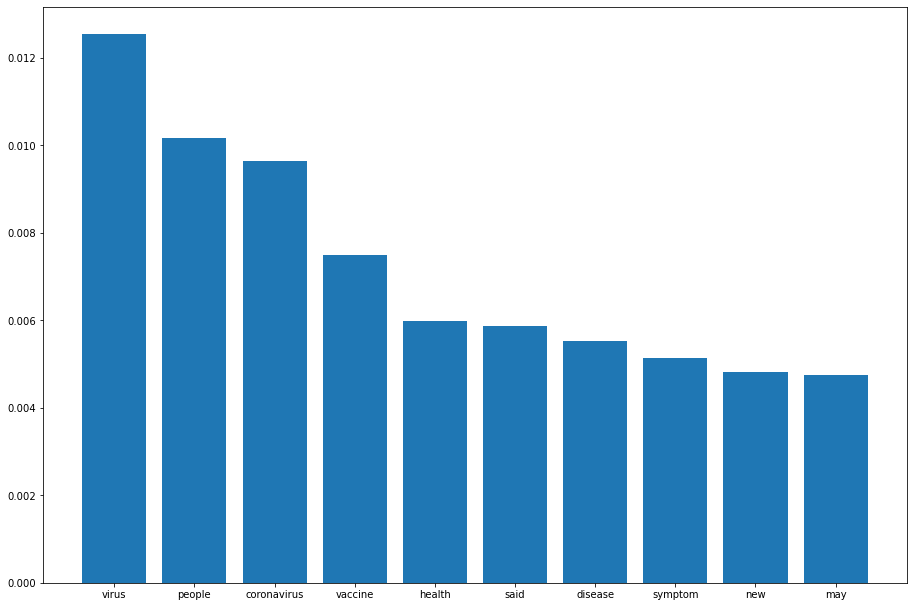

In [37]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(top_10_true_words, top_10_true_percentage_of_true)
plt.show()

### Top 10 Words in True Articles (as percentage of total number of words in fake articles + true articles)

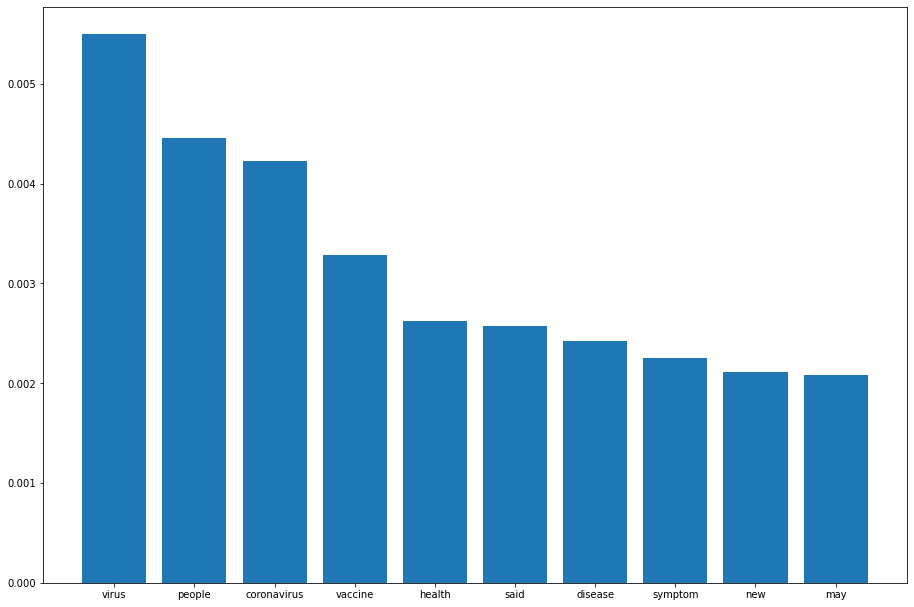

In [38]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(top_10_true_words, top_10_true_percentage_of_total)
plt.show()

### Word with most frequency

In [39]:
## Fixed

original_vocab_counts = np.array(X.toarray())
original_vocab_counts = original_vocab_counts.sum(axis=0)

original_term_counts = dict()

for term, index in vectorizerText.vocabulary_.items():
    original_term_counts[term] = original_vocab_counts[index]

print(sorted(original_term_counts.items(), key=(lambda x : -x[1]))[0])

('virus', 4314)


### Word with least frequency

In [40]:
## Fixed

print(sorted(original_term_counts.items(), key=(lambda x : x[1]))[0])

('magnitude', 12)


### Top 10 words that appear in true articles but not in false articles

In [41]:
## Fixed

words_in_fake = set(fake_term_counts.keys())
words_in_true = set(true_term_counts.keys())
words_in_true_not_in_fake = words_in_true - words_in_fake

words_in_true_not_in_fake_term_counts = dict()

for term, index in vectorizerText.vocabulary_.items():
    if term in words_in_true_not_in_fake:
        words_in_true_not_in_fake_term_counts[term] = original_vocab_counts[index]

print(sorted(words_in_true_not_in_fake_term_counts.items(), key=(lambda x : -x[1]))[:10])

[('droplet', 155), ('weather', 108), ('infected person', 107), ('tracing', 101), ('sneeze', 89), ('close contact', 89), ('bathroom', 81), ('contact tracing', 80), ('provider', 79), ('sanitizer', 79)]


### Top 10 words that appear in false articles but not in true articles

In [42]:
words_in_fake_not_in_true = words_in_fake - words_in_true

words_in_fake_not_in_true_term_counts = dict()

for term, index in vectorizerText.vocabulary_.items():
    if term in words_in_fake_not_in_true:
        words_in_fake_not_in_true_term_counts[term] = original_vocab_counts[index] 
        
print(sorted(words_in_fake_not_in_true_term_counts.items(), key=(lambda x : -x[1]))[:10])

[('wuhan coronavirus', 170), ('biological weapon', 156), ('warfare', 148), ('intravenous', 144), ('communist', 124), ('biological warfare', 120), ('agenda', 115), ('intravenous vitamin', 105), ('patent', 104), ('boyle', 97)]
